In [11]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(xtrain, x1), (xtest, x2) = mnist.load_data()
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255
xtrain = np.reshape(xtrain, (len(xtrain), 28, 28, 1))
xtest  = np.reshape(xtest, (len(xtest), 28, 28, 1))

In [9]:
noise = 0.5
xtrain_noisy = xtrain + noise + np.random.normal(loc = 0, scale = 1, size = xtrain.shape)
xtest_noisy = xtest + noise + np.random.normal(loc = 0, scale = 1, size = xtest.shape)
xtrain_noisy = np.clip(xtrain_noisy, 0., 1)
xtest_noisy = np.clip(xtest_noisy, 0., 1)

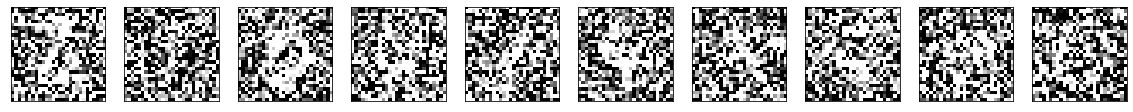

In [14]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtest_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
imginput = keras.Input(shape = (28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(imginput)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
#end of convolution layers
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
#end of upsampling
autoencoder = keras.Model(imginput, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
autoencoder.fit(xtrain_noisy, xtrain,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(xtest_noisy, xtest))

Epoch 1/100
469/469 [==============================] - 56s 117ms/step - loss: 0.2345 - val_loss: 0.1931
Epoch 2/100
469/469 [==============================] - 56s 119ms/step - loss: 0.1896 - val_loss: 0.1840
Epoch 3/100
469/469 [==============================] - 52s 110ms/step - loss: 0.1829 - val_loss: 0.1795
Epoch 4/100
469/469 [==============================] - 53s 112ms/step - loss: 0.1795 - val_loss: 0.1782
Epoch 5/100
469/469 [==============================] - 53s 114ms/step - loss: 0.1768 - val_loss: 0.1747
Epoch 6/100
469/469 [==============================] - 52s 110ms/step - loss: 0.1752 - val_loss: 0.1728
Epoch 7/100
469/469 [==============================] - 51s 108ms/step - loss: 0.1738 - val_loss: 0.1721
Epoch 8/100
469/469 [==============================] - 51s 108ms/step - loss: 0.1726 - val_loss: 0.1708
Epoch 9/100
469/469 [==============================] - 51s 108ms/step - loss: 0.1718 - val_loss: 0.1702
Epoch 10/100
469/469 [==============================] - 55s 117m

469/469 [==============================] - 55s 117ms/step - loss: 0.1599 - val_loss: 0.1602
Epoch 80/100
469/469 [==============================] - 75s 161ms/step - loss: 0.1599 - val_loss: 0.1601
Epoch 81/100
469/469 [==============================] - 82s 174ms/step - loss: 0.1600 - val_loss: 0.1598
Epoch 82/100
469/469 [==============================] - 84s 180ms/step - loss: 0.1599 - val_loss: 0.1605
Epoch 83/100
469/469 [==============================] - 85s 180ms/step - loss: 0.1598 - val_loss: 0.1603
Epoch 84/100
469/469 [==============================] - 89s 189ms/step - loss: 0.1599 - val_loss: 0.1598
Epoch 85/100
469/469 [==============================] - 84s 180ms/step - loss: 0.1599 - val_loss: 0.1606
Epoch 86/100
469/469 [==============================] - 82s 175ms/step - loss: 0.1599 - val_loss: 0.1600
Epoch 87/100
469/469 [==============================] - 87s 185ms/step - loss: 0.1597 - val_loss: 0.1599
Epoch 88/100
469/469 [==============================] - 89s 190ms/st

In [21]:
denoisedimgs = autoencoder.predict(xtest_noisy)

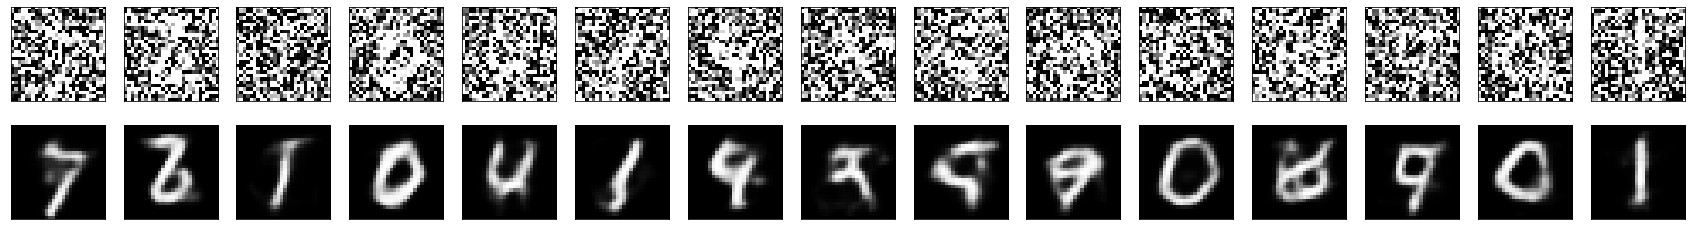

In [27]:
n = 15
plt.figure(figsize = (30, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(denoisedimgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
'''
Result: Good recovery of the digits considering the noise was enough to mask the digits themselves
'''